In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd  # Import the Pandas library for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
import numpy as np  # Import NumPy for numerical operations
import math  # Import Python's built-in math library
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling
from sklearn.metrics import mean_squared_error  # Import mean_squared_error for model evaluation
from keras.models import Sequential  # Import Keras Sequential for defining neural network models
from keras.layers import Dense, Activation  # Import Keras layers for the neural network
from keras.layers import LSTM  # Import Keras LSTM layer for sequence data
import preprocessing  # Import a custom module named "preprocessing" (assuming it contains data prep functions)

# PLOTTING ALL INDICATORS IN ONE PLOT

In [2]:
dataset = pd.read_csv('AAPL.csv', usecols=[1,2,3,4])# Read a CSV file containing Apple stock data, selecting columns 1-4
dataset = dataset.reindex(index=dataset.index[::-1])  # Reverse the order of rows in the dataset


# Initial Data Inspection

In [3]:
print(dataset.head())  # View the first few rows of the dataset
print(dataset.info())  # Get information about data types and missing values
print(dataset.describe())  # Summary statistics of numeric columns
print(dataset.shape)  # Get the number of rows and columns


            Open        High         Low       Close
1256  169.020004  171.169998  168.869995  170.289993
1255  166.910004  168.960007  166.830002  168.220001
1254  170.369995  171.380005  165.669998  166.889999
1253  171.880005  173.059998  170.649994  171.100006
1252  173.050003  173.669998  171.449997  173.440002
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 1256 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
dtypes: float64(4)
memory usage: 39.4 KB
None
              Open         High          Low        Close
count  1257.000000  1257.000000  1257.000000  1257.000000
mean    118.151989   119.542166   116.857546   118.259079
std      46.826697    47.301386    46.373061    46.847331
min      35.994999    36.430000    35.500000    35.547501
25%      69.875000

# Handing with missing values

In [4]:
print(dataset.isnull().sum())  # Check for missing values in each column
data = dataset.fillna(0)  # Replace missing values with a specific value


Open     0
High     0
Low      0
Close    0
dtype: int64


In [5]:
OHLC_avg = dataset.mean(axis=1)  # Calculate the mean of each row in the dataset
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis=1)  # Calculate the mean of specific columns in each row
close_val = dataset[['Close']]  # Select the 'Close' column
high = dataset[['High']]  # Select the 'High' column

In [6]:
print(OHLC_avg)

1256    169.837497
1255    167.730004
1254    168.577499
1253    171.672501
1252    172.902500
           ...    
4        50.756250
3        50.528125
2        52.256874
1        55.027500
0        54.550625
Length: 1257, dtype: float64


In [7]:
print(HLC_avg)

1256    170.109995
1255    168.003337
1254    167.980001
1253    171.603333
1252    172.853332
           ...    
4        50.848334
3        50.345833
2        52.213332
1        55.115833
0        54.660833
Length: 1257, dtype: float64


In [8]:
print(close_val)

           Close
1256  170.289993
1255  168.220001
1254  166.889999
1253  171.100006
1252  173.440002
...          ...
4      50.942501
3      50.397499
2      51.869999
1      55.555000
0      54.715000

[1257 rows x 1 columns]


In [9]:
obs = np.arange(1, len(dataset) + 1, 1)# Create an array of observation numbers
print(obs)

[   1    2    3 ... 1255 1256 1257]


# PLOTTING ALL INDICATORS IN ONE PLOT



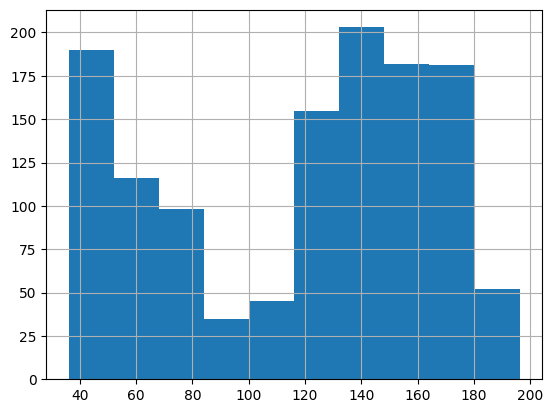

In [10]:
data['Open'].hist()#
plt.show()

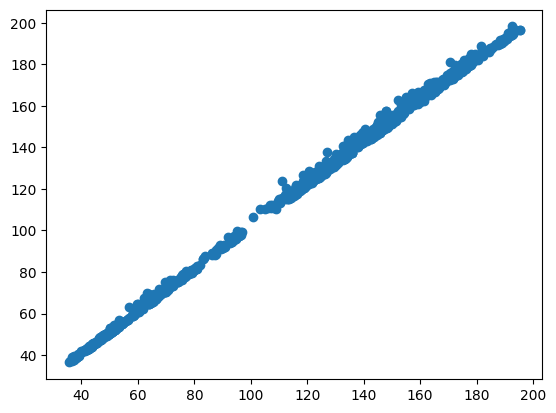

In [11]:
plt.scatter(data['Low'], data['High'])  # Scatter plot for two variables
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e055420cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e059ee1a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e057e18b10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e059ee2ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e059ee32d0>],
 'means': []}

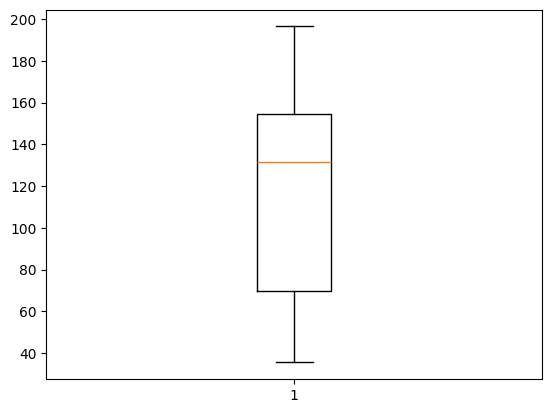

In [12]:
plt.boxplot(data['Close'])  # Box plot for a numeric column

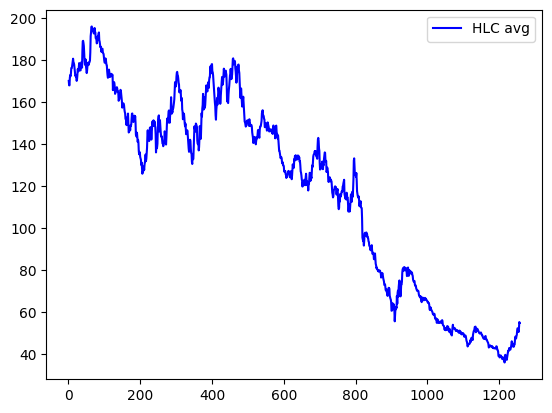

In [13]:
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.legend(loc = 'upper right')
plt.show()

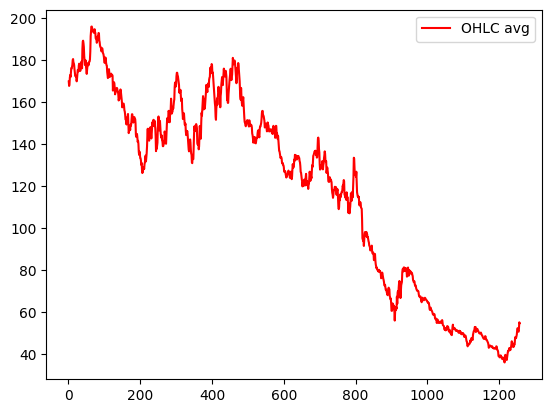

In [14]:
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.legend(loc = 'upper right')
plt.show()

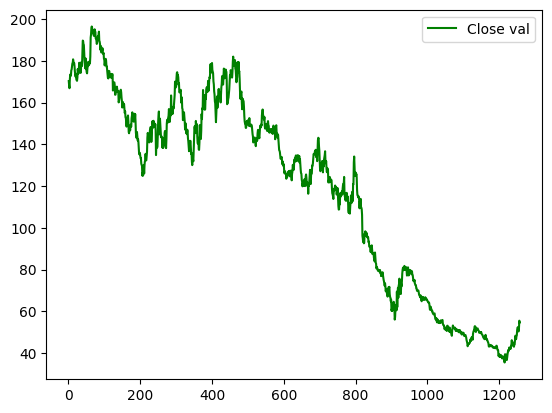

In [15]:
plt.plot(obs, close_val, 'g', label = 'Close val')
plt.legend(loc = 'upper right')
plt.show()

# Data Distribution Analysis

In [16]:
data['Open'].skew()  # Skewness



-0.34316270224721573

**Skewness: measures the asymmetry of the data distribution. Positive skew indicates a long tail on the right, while negative skew indicates a long tail on the left.**

**Kurtosis: measures the "tailedness" of the data distribution. High kurtosis suggests heavy tails and more outliers, while low kurtosis suggests light tails.**


# Categorical Variables Analysis

**For categorical variables, explore unique values and their counts.**

In [17]:
data['Open'].value_counts()  # Count unique values


Open
142.699997    3
127.820000    3
161.119995    2
169.080002    2
126.010002    2
             ..
171.679993    1
172.860001    1
171.729996    1
176.050003    1
54.220001     1
Name: count, Length: 1202, dtype: int64

In [18]:
data['Low'].value_counts()


Low
142.649994    3
133.770004    3
147.679993    3
129.649994    2
153.610001    2
             ..
166.559998    1
170.250000    1
170.050003    1
168.470001    1
54.154999     1
Name: count, Length: 1210, dtype: int64

In [19]:
data['High'].value_counts()


High
151.570007    3
135.529999    2
146.699997    2
125.180000    2
149.869995    2
             ..
174.839996    1
175.880005    1
176.240005    1
174.100006    1
55.112499     1
Name: count, Length: 1202, dtype: int64

In [20]:
data['Close'].value_counts()

Close
145.860001    3
175.839996    3
163.759995    3
147.919998    2
151.600006    2
             ..
159.220001    1
170.330002    1
174.779999    1
172.899994    1
54.715000     1
Name: count, Length: 1204, dtype: int64

# Correlation Analysis

**using correlation matrices and heatmaps**

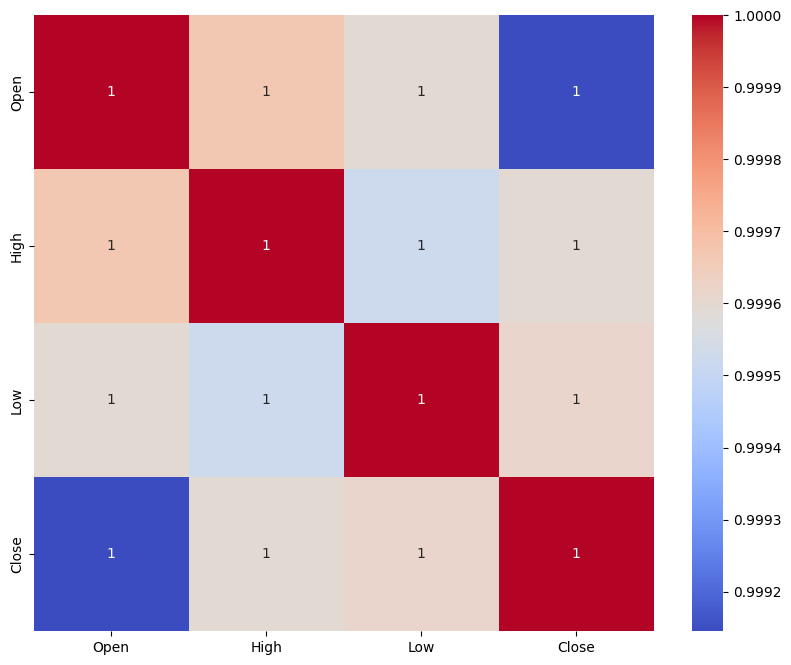

In [21]:
# Using correlation matrices and heatmaps
correlation_matrix = data.corr()  # Calculate the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Create a heatmap with annotations
plt.show()  # Show the heatmap

# Create lag features for daily returns

In [22]:

# Create lag features for daily returns
data['Return_1'] = data['Close'].pct_change(1)  # Create a feature for 1-day returns
data['Return_2'] = data['Close'].pct_change(2)  # Create a feature for 2-day returns
data['SMA_20'] = data['Close'].rolling(window=20).mean()  # Calculate a 20-day simple moving average


# Prepration of the time series data

In [24]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg), 1))  # Reshape OHLC_avg
scaler = MinMaxScaler(feature_range=(0, 1))  # Create a Min-Max scaler
OHLC_avg = scaler.fit_transform(OHLC_avg)  # Scale OHLC_avg

In [25]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.80)  # Calculate the index for the training data
test_OHLC = len(OHLC_avg) - train_OHLC  # Calculate the index for the test data
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC, :], OHLC_avg[train_OHLC:len(OHLC_avg), :]  # Split the data

In [26]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)  # Create a time series dataset for training
testX, testY = preprocessing.new_dataset(test_OHLC, 1)  # Create a time series dataset for testing

In [27]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))  # Reshape the training data
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))  # Reshape the test data
step_size = 1  # Set the step size for time series analysis


In [28]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))


In [29]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1003/1003 - 5s - loss: 0.3304 - 5s/epoch - 5ms/step
Epoch 2/5
1003/1003 - 2s - loss: 0.2370 - 2s/epoch - 2ms/step
Epoch 3/5
1003/1003 - 2s - loss: 0.1754 - 2s/epoch - 2ms/step
Epoch 4/5
1003/1003 - 2s - loss: 0.1289 - 2s/epoch - 2ms/step
Epoch 5/5
1003/1003 - 2s - loss: 0.0944 - 2s/epoch - 2ms/step


In [30]:
# PREDICTION
trainPredict = model.predict(trainX)  # Make predictions on the training data
testPredict = model.predict(testX)  # Make predictions on the test data

8/8 [==============================] - 0s 2ms/step


In [31]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)  # De-normalize the training predictions
trainY = scaler.inverse_transform([trainY])  # De-normalize the actual training targets
testPredict = scaler.inverse_transform(testPredict)  # De-normalize the test predictions
testY = scaler.inverse_transform([testY])  # De-normalize the actual test targets

In [32]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))  # Calculate the root mean squared error for training
print('Train RMSE: %.2f' % (trainScore))  # Print the training RMSE


Train RMSE: 45.48


In [33]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))  # Calculate the root mean squared error for testing
print('Test RMSE: %.2f' % (testScore))  # Print the testing RMSE


Test RMSE: 44.52


In [34]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)  # Create an array for plotting train predictions
trainPredictPlot[:, :] = np.nan # Fill the array with NaN values
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict # Add train predictions to the plot data


In [35]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)  # Create an array for plotting test predictions
testPredictPlot[:, :] = np.nan  # Fill the array with NaN values
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict  # Add test predictions to the plot data


In [36]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg) # De-normalize the main dataset

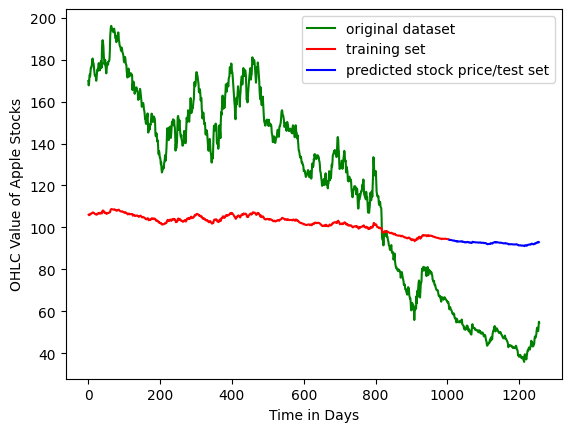

In [37]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label='original dataset')  # Plot the original dataset in green
plt.plot(trainPredictPlot, 'r', label='training set')  # Plot training predictions in red
plt.plot(testPredictPlot, 'b', label='predicted stock price/test set')  # Plot test predictions in blue
plt.legend(loc='upper right')  # Display a legend in the upper right corner
plt.xlabel('Time in Days')  # Set the x-axis label
plt.ylabel('OHLC Value of Apple Stocks')  # Set the y-axis label
plt.show()

In [38]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]  # Get the last predicted value from the test set
last_val_scaled = last_val/last_val  # Scale the last predicted value
next_val = model.predict(np.reshape(last_val_scaled, (1, 1, 1)))  # Predict the next value based on the scaled last value
print(("Last Day Value:"), np.ndarray.item(last_val))  # Print the last day's predicted value
print(("Next Day Value:"), np.ndarray.item(last_val*next_val))  # Print the next day's predicted value
print(np.append(last_val, next_val))  # Print both the last and next day's predicted values

1/1 [==============================] - 0s 24ms/step
Last Day Value: 92.98097229003906
Next Day Value: 42.30851745605469
[92.98097     0.45502338]
